In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import torch
import torch.nn as nn

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

In [5]:
num_points = 25#50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = torch.Tensor(np.c_[x1, x2])

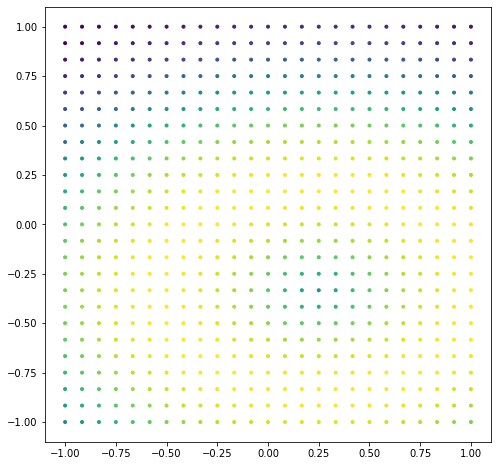

In [6]:
# %matplotlib inline
plt.scatter(X1, X2, marker='.', c=Y)
plt.show()

## Interactive plot

In [7]:
W = torch.eye(2)
W

tensor([[1., 0.],
        [0., 1.]])

In [8]:
We = torch.zeros(2,2)

In [172]:
_a = widgets.FloatSlider(W[0,0], min=-3, max=3, step=0.1, continuous_update=False, description='W_00')
_b = widgets.FloatSlider(W[0,1], min=-3, max=3, step=0.1, continuous_update=False, description='W_01')
_c = widgets.FloatSlider(W[1,0], min=-3, max=3, step=0.1, continuous_update=False, description='W_10')
_d = widgets.FloatSlider(W[1,1], min=-3, max=3, step=0.1, continuous_update=False, description='W_11')


_e = widgets.FloatSlider(We[0,0], min=-3, max=3, step=0.1, continuous_update=False, description='We_00')
_f = widgets.FloatSlider(We[0,1], min=-3, max=3, step=0.1, continuous_update=False, description='We_01')
_g = widgets.FloatSlider(We[1,0], min=-3, max=3, step=0.1, continuous_update=False, description='We_10')
_h = widgets.FloatSlider(We[1,1], min=-3, max=3, step=0.1, continuous_update=False, description='We_11')


_row0 = widgets.HBox([_a, _b])
_row1 = widgets.HBox([_c, _d])
_ui_W = widgets.VBox([_row0, _row1])

_row0b = widgets.HBox([_e, _f])
_row1b = widgets.HBox([_g, _h])
_ui_We = widgets.VBox([_row0b, _row1b])

_ui = widgets.VBox([_ui_W, _ui_We])

def interactive_function(a, b, c, d, e, f, g, h):
    global W, We, yout
    
    W = torch.FloatTensor([[a,b],[c,d]])
    We = torch.FloatTensor([[e,f],[g,h]])
    
    with torch.no_grad():
        yout = torch.matmul(xx, W) + torch.matmul(xx, We)
    
    y1, y2 = yout[:,0].numpy().reshape(X1.shape), yout[:,1].numpy().reshape(X1.shape)
    plt.figure(figsize=(8,8))
    plt.scatter(y1, y2, c=Y, marker='o')
    plt.plot(y1, y2, lw=0.5)
    plt.plot(y1.T, y2.T, c='k', lw=0.5)
    
        
    plt.scatter(X1, X2, c=Y, marker='.', alpha=0.5)
    plt.plot(X1, X2, c='k', lw=0.5, alpha=0.5)
    plt.plot(X1.T, X2.T, c='k', lw=0.5, alpha=0.5)
    
    ## x-axis
    plt.plot(y1[12,:], y2[12,:], c='k', lw=2)
    x, y, tx, ty = y1[12,12], y2[12,12], y1[24,12], y2[24,12]
    u, v = tx-x, ty-y
#     plt.scatter(x, y)
#     plt.scatter(tx, ty)
    plt.arrow(x, y, u, v, lw=2, color='r', head_starts_at_zero=True, width=0.01)
    
    plt.plot(y1[:,12], y2[:,12], c='k', lw=2)
    plt.axis([-1.2, 1.2, -1.2, 1.2])
    plt.show()
    
    print(W)
    print(We)
        

interactive_plot = widgets.interactive_output(interactive_function,
                                              {'a': _a, 'b': _b, 'c': _c, 'd': _d,
                                               'e': _e, 'f': _f, 'g': _g, 'h': _h}
                                             )

display(_ui, interactive_plot)

Output()

In [174]:
torch.norm(We, dim=1, keepdim=True)

tensor([[1.4318],
        [0.5385]])

In [11]:
y1, y2 = yout[:,0].numpy().reshape(X1.shape), yout[:,1].numpy().reshape(X1.shape)
## this is unit vector in x
y1[12,12], y2[12,12], y1[0,24]-y1[12,12], y2[12,12]-y2[12,12]

(0.0, 0.0, 1.0, 0.0)

In [135]:
np.linalg.svd(We)

(array([[-0.78820544,  0.6154122 ],
        [ 0.6154122 ,  0.78820544]], dtype=float32),
 array([0.3622583 , 0.22083692], dtype=float32),
 array([[ 0.9925076 , -0.12218325],
        [-0.12218325, -0.9925076 ]], dtype=float32))

In [136]:
We

tensor([[-0.3000, -0.1000],
        [ 0.2000, -0.2000]])

In [141]:
We/torch.norm(We, dim=0, keepdim=True)

tensor([[-0.8321, -0.4472],
        [ 0.5547, -0.8944]])

## Interactive plot LeakyRelu

In [12]:
W1 = torch.Tensor([[1], [1]])
W2 = torch.Tensor([[1, 0]])

W1.shape

torch.Size([2, 1])

In [171]:
_a = widgets.FloatSlider(W[0,0], min=-3, max=3, step=0.1, continuous_update=False, description='W_00')
_b = widgets.FloatSlider(W[0,1], min=-3, max=3, step=0.1, continuous_update=False, description='W_01')
_c = widgets.FloatSlider(W[1,0], min=-3, max=3, step=0.1, continuous_update=False, description='W_10')
_d = widgets.FloatSlider(W[1,1], min=-3, max=3, step=0.1, continuous_update=False, description='W_11')


_e = widgets.FloatSlider(W1[0,0], min=-3, max=3, step=0.05, continuous_update=False, description='W1_0')
_f = widgets.FloatSlider(W2[0,0], min=-3, max=3, step=0.05, continuous_update=False, description='W2_0')
_g = widgets.FloatSlider(W1[1,0], min=-3, max=3, step=0.05, continuous_update=False, description='W1_1')
_h = widgets.FloatSlider(W2[0,1], min=-3, max=3, step=0.05, continuous_update=False, description='W2_1')


_row0 = widgets.HBox([_a, _b])
_row1 = widgets.HBox([_c, _d])
_ui_W = widgets.VBox([_row0, _row1])

_row0b = widgets.HBox([_e, _f])
_row1b = widgets.HBox([_g, _h])
_ui_We = widgets.VBox([_row0b, _row1b])

_ui2 = widgets.VBox([_ui_W, _ui_We])


def interactive_function(a, b, c, d, e, f, g, h):
    global W, W1, W2, yout
    %matplotlib inline
    plt.figure(figsize=(8,8))
    
    
    W = torch.FloatTensor([[a,b],[c,d]])
    W1 = torch.FloatTensor([[e],[g]])
    W1 = W1/torch.norm(W1)
    print(W1)    
    W2 = torch.FloatTensor([[f,h]])
    
    W12 = torch.matmul(W1, W2)
    print(W12)
    print(W12/torch.norm(W12, dim=0, keepdim=True))
#     print(torch.norm(W12, dim=0))
#     print(torch.norm(W12, dim=1))
    s, v = np.linalg.eig(W12+W)
    print(s)
#     print(v)
    s, v = np.linalg.eig(W12)
    print(s)
    print(v)
    
    with torch.no_grad():
        yout = torch.matmul(xx, W)
        res = torch.matmul(xx, W1)
#         res = nn.functional.leaky_relu(res, 0.1)
        res = nn.functional.relu(res)
        res = torch.matmul(res, W2)
        yout = yout+res
    
    y1, y2 = yout[:,0].numpy().reshape(X1.shape), yout[:,1].numpy().reshape(X1.shape)
    plt.scatter(y1, y2, c=Y, marker='o')
    plt.plot(y1, y2, lw=0.5)
    plt.plot(y1.T, y2.T, c='k', lw=0.5)
    
    plt.scatter(X1, X2, c=Y, marker='.', alpha=0.5)
    plt.plot(X1, X2, c='k', lw=0.5, alpha=0.5)
    plt.plot(X1.T, X2.T, c='k', lw=0.5, alpha=0.5)
    
    
    ## x-axis
    plt.plot(y1[12,:], y2[12,:], c='k', lw=2)
    x, y, tx, ty = y1[12,12], y2[12,12], y1[24,12], y2[24,12]
    u, v = tx-x, ty-y
#     plt.scatter(x, y)
#     plt.scatter(tx, ty)
    plt.arrow(x, y, u, v, lw=2, color='r', head_starts_at_zero=True, width=0.01)
    
    plt.plot(y1[:,12], y2[:,12], c='k', lw=2)
    plt.axis([-1.2, 1.2, -1.2, 1.2])
    plt.show()
    
    print(W)
    s, v = np.linalg.eig(W)
    print(s)
    print(v)
    
        

interactive_plot = widgets.interactive_output(interactive_function,
                                              {'a': _a, 'b': _b, 'c': _c, 'd': _d,
                                               'e': _e, 'f': _f, 'g': _g, 'h': _h}
                                             )

display(_ui2, interactive_plot)

Output()

In [143]:
### Conclusion 0

'''
1. The singular values of overall transformation > 0 will make it invertible
2. 
'''

'\n1. The singular values of overall transformation > 0 will make it invertible\n2. \n'

## Rough

In [144]:
W12 = torch.matmul(W1, W2)
print(W12)
print(W12/torch.norm(W12, dim=0))

print('Norms')
print(torch.norm(W12, dim=0, keepdim=True))
print(torch.norm(W12, dim=1, keepdim=True))

tensor([[-0.7028, -0.3514],
        [-0.5622, -0.2811]])
tensor([[-0.7809, -0.7809],
        [-0.6247, -0.6247]])
Norms
tensor([[0.9000, 0.4500]])
tensor([[0.7857],
        [0.6286]])


In [145]:
s, v = np.linalg.eig(W12+W)
print(s)
print(v)

[0.01610537 1.        ]
[[-0.78086877  0.44721362]
 [-0.62469506 -0.8944272 ]]


In [146]:
s, v = np.linalg.eig(W12)
print(s)
print(v)

[-0.9838946  0.       ]
[[-0.78086877  0.4472136 ]
 [-0.62469506 -0.8944272 ]]


In [147]:
(W12@v[:,:1])/v[:,:1]

tensor([[-0.9839],
        [-0.9839]])

In [148]:
W12

tensor([[-0.7028, -0.3514],
        [-0.5622, -0.2811]])

In [149]:
v[:,:1]

array([[-0.78086877],
       [-0.62469506]], dtype=float32)

In [150]:
W12@v[:,:1]

tensor([[0.7683],
        [0.6146]])

In [151]:
(W12[0, :]*v[:,0]).sum()/v[0,0]

tensor(-0.9839)

In [152]:
s, v = np.linalg.eig(W)
print(s)
print(v)

[1. 1.]
[[1. 0.]
 [0. 1.]]


In [169]:
y1, y2 = yout[:,0].numpy().reshape(X1.shape), yout[:,1].numpy().reshape(X1.shape)

In [170]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, y1, cmap='plasma')
ax.scatter(X1, X2, y2, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.pause(10)
plt.show()